# Stock Price Predictor

In [6]:
import numpy as np
import pandas as pd

import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
stocks = input("Enter the code of the stock: ")
data = yf.download(stocks, "2015-01-01", "2025-01-01", auto_adjust=True)
data.head()

Enter the code of the stock:  NVDA


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2015-01-02,0.483143,0.486744,0.475463,0.483143,113680000
2015-01-05,0.474983,0.484584,0.472823,0.483143,197952000
2015-01-06,0.460582,0.476183,0.460102,0.475703,197764000
2015-01-07,0.459382,0.468023,0.457942,0.463943,321808000
2015-01-08,0.476663,0.479543,0.464423,0.464663,283780000


In [14]:
data.shape

(2516, 5)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2015-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NVDA)   2516 non-null   float64
 1   (High, NVDA)    2516 non-null   float64
 2   (Low, NVDA)     2516 non-null   float64
 3   (Open, NVDA)    2516 non-null   float64
 4   (Volume, NVDA)  2516 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


In [18]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,20.790237,21.168330,20.378640,20.792684,4.676480e+08
std,32.319634,32.922300,31.680255,32.357090,2.536131e+08
min,0.459382,0.468023,0.454582,0.463703,5.244800e+07
25%,3.545609,3.595442,3.450370,3.516203,3.055120e+08
50%,6.483647,6.540966,6.339293,6.441926,4.151695e+08
75%,21.232123,21.736932,20.810232,21.170354,5.640210e+08
max,148.869751,152.879470,146.249911,149.339720,3.692928e+09


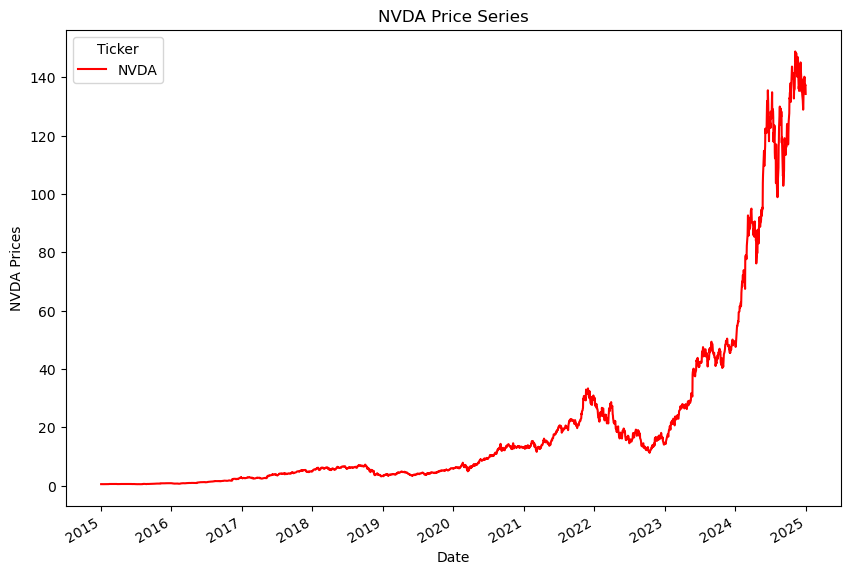

In [22]:
data.Close.plot(figsize=(10,7), color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

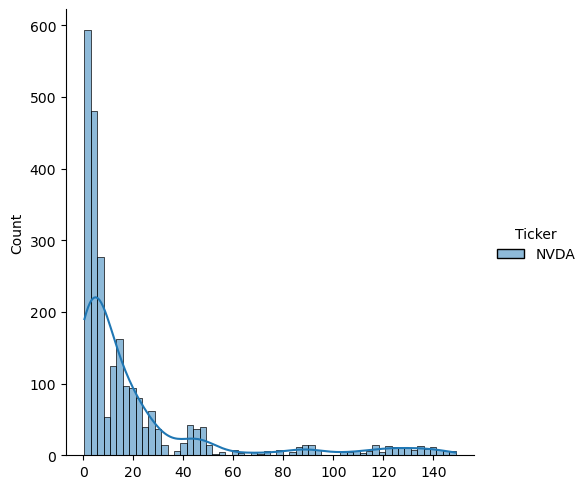

In [32]:
sns.displot(data["Close"], kde=True)

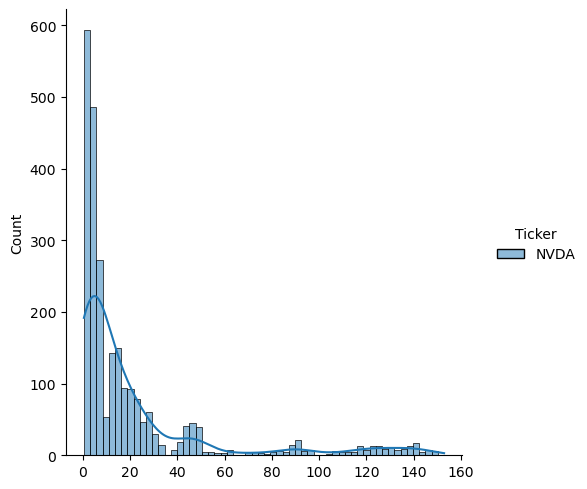

In [34]:
sns.displot(data["High"], kde=True)

In [49]:
# Linear Regression
X = data.drop("Close", axis=1)
y = data["Close"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 

(2012, 4)
(504, 4)
(2012, 1)
(504, 1)


In [51]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

In [53]:
pred1

array([[  5.8805276 ],
       [  6.11269723],
       [  2.42825712],
       [  7.18715539],
       [ 56.67065827],
       [  6.94937704],
       [  6.25760947],
       [ 18.49616348],
       [ 13.27633756],
       [ 15.65255171],
       [  0.88861168],
       [  3.74196598],
       [  0.55663645],
       [  1.56795198],
       [  2.65440036],
       [  0.85788209],
       [ 31.96380985],
       [  3.87212835],
       [ 31.63284046],
       [  3.74530963],
       [  3.79466959],
       [ 30.22797741],
       [ 20.91028713],
       [ 10.39830544],
       [  4.74287812],
       [  6.15520453],
       [  0.79834616],
       [  4.09229386],
       [  3.62274516],
       [  3.81427671],
       [  3.68536951],
       [123.87381541],
       [  0.52451665],
       [ 44.50612766],
       [ 13.34347314],
       [  3.59124288],
       [  1.30318667],
       [  5.1663114 ],
       [  2.31757969],
       [  4.37773918],
       [  0.85876315],
       [  1.36902556],
       [ 46.71805191],
       [ 12

In [61]:
# MSE 
# RMSE

from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, y_pred):
    '''
    y_test: - actual values
    y_pred: - model predicted values
    '''
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_scores = r2_score(y_test, y_pred)

    print("MSE: ", mse) 
    print("RMSE: ", rmse) 
    print("R2_score: ", r2_scores) 
    
calculate_metrics(y_test, pred1)


MSE:  0.22852360823722637
RMSE:  0.4780414294150941
R2_score:  0.9998147569195575


In [85]:
from sklearn.linear_model import Lasso, Ridge

la = Lasso(alpha=1.0, max_iter=10000).fit(X_train, y_train)
ri = Ridge(alpha=10.0, solver='svd').fit(X_train, y_train)

la_p = la.predict(X_test)
ri_p = ri.predict(X_test)

In [87]:
calculate_metrics(y_test, la_p)

MSE:  0.45738306188865424
RMSE:  0.6763010142596669
R2_score:  0.9996292416001128


In [89]:
calculate_metrics(y_test, ri_p)

MSE:  0.2266688631384556
RMSE:  0.4760975353207109
R2_score:  0.9998162603908977
